<a href="https://colab.research.google.com/github/Someshwarms/Maximum-Minimum-Temperature-prediction-using-ML/blob/main/Max_%26_Min_Temperature_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

**Importing  all the files and the packages which is required for this project.Link of the dataset: https://www.kaggle.com/smokingkrils/temperature-forecast-project-using-ml.** 

In [2]:
df=pd.read_csv("/content/drive/MyDrive/temp.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.shape

(7752, 25)

**I am checking for null values in the dataset using isnull fuction.**

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

**As we see almost in the all the columns we have null values we replace all this null with mean or median or mode of the particular columns.**

In [6]:
median=df['Present_Tmax'].median()
median

29.9

In [7]:
df['Present_Tmax'].fillna(29.9,inplace=True)

In [8]:
median1=df['Present_Tmin'].median()
median1

23.4

In [9]:
df['Present_Tmin'].fillna(23.4,inplace=True)

In [10]:
median2=df['LDAPS_RHmin'].median()
median2

55.03902435

In [11]:
df['LDAPS_RHmin'].fillna(55.04,inplace=True)

In [12]:
median3=df['LDAPS_RHmax'].median()
median3

89.79347992

In [13]:
df['LDAPS_RHmax'].fillna(89.8,inplace=True)

In [14]:
median4=df['LDAPS_Tmax_lapse'].median()
median4

29.70342642

In [15]:
df['LDAPS_Tmax_lapse'].fillna(29.7,inplace=True)

In [16]:
median5=df['LDAPS_Tmin_lapse'].median()
median5

23.76019884

In [17]:
df['LDAPS_Tmin_lapse'].fillna(23.76,inplace=True)

In [18]:
median6=df['LDAPS_WS'].median()
median6

6.547470301000001

In [19]:
df['LDAPS_WS'].fillna(6.55,inplace=True)

In [20]:
median7=df['LDAPS_LH'].median()
median7

56.86548154

In [21]:
df['LDAPS_LH'].fillna(56.86,inplace=True)

In [22]:
median8=df['LDAPS_CC1'].median()
median8

0.315696837

In [23]:
df['LDAPS_CC1'].fillna(0.32,inplace=True)

In [26]:
median9=df['LDAPS_CC2'].mean()
median9

0.35608043728396527

In [27]:
df['LDAPS_CC2'].fillna(0.35,inplace=True)

In [29]:
median10=df['LDAPS_CC3'].median()
median10

0.26255460399999997

In [30]:
df['LDAPS_CC3'].fillna(0.26,inplace=True)

In [32]:
median11=df['LDAPS_CC4'].median()
median11

0.22766446899999998

In [33]:
df['LDAPS_CC4'].fillna(0.23,inplace=True)

In [35]:
median12=df['LDAPS_PPT1'].mean()
median12

0.5919945266984501

In [36]:
df['LDAPS_PPT1'].fillna(0.6,inplace=True)

In [38]:
median13=df['LDAPS_PPT2'].mean()
median13

0.4850025590969125

In [39]:
df['LDAPS_PPT2'].fillna(0.48,inplace=True)

In [41]:
median14=df['LDAPS_PPT3'].mean()
median14

0.2781996392747162

In [42]:
df['LDAPS_PPT3'].fillna(0.28,inplace=True)

In [44]:
median15=df['LDAPS_PPT4'].mean()
median15

0.26940734997772564

In [45]:
df['LDAPS_PPT4'].fillna(0.27,inplace=True)

In [46]:
median16=df['Next_Tmax'].median()
median16

30.5

In [47]:
df['Next_Tmax'].fillna(30.5,inplace=True)

In [48]:
median17=df['Next_Tmin'].median()
median17

23.1

In [49]:
df['Next_Tmin'].fillna(23.1,inplace=True)

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

**Feature Extraction with the help date column.**

In [53]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [56]:
df['Day_no']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.weekday
df['Month']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.month
df['Year']=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.year

In [57]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day_no,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,6,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,6,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,6,2013


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


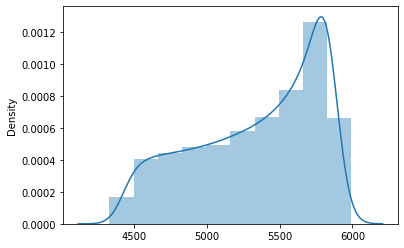

In [85]:
sns.distplot(x=df['Solar radiation'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


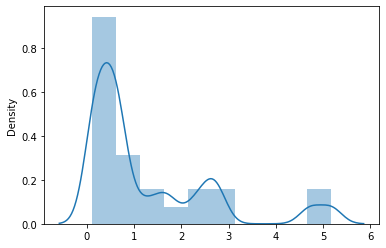

In [83]:
sns.distplot(x=df['Slope'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


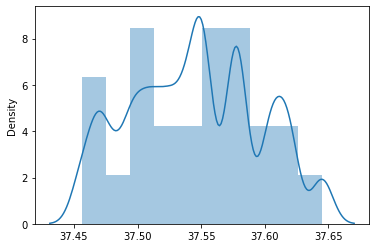

In [82]:
sns.distplot(x=df['lat'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


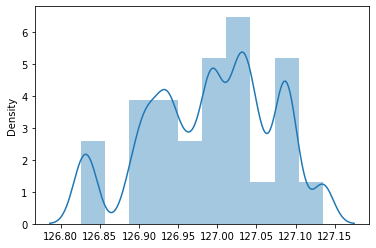

In [80]:
sns.distplot(x=df['lon'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


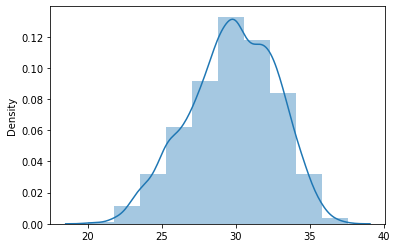

In [76]:
sns.distplot(x=df['Present_Tmax'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


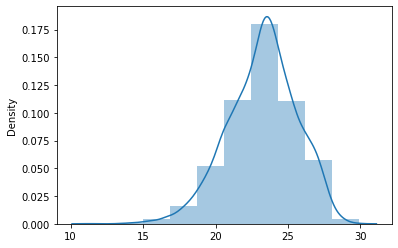

In [77]:
sns.distplot(x=df['Present_Tmin'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


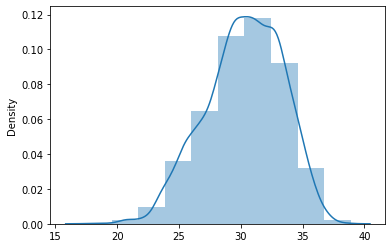

In [78]:
sns.distplot(x=df['Next_Tmax'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


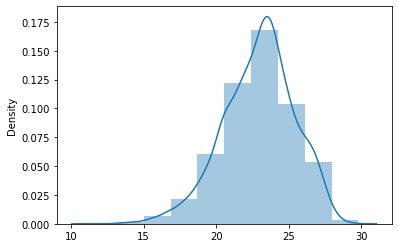

In [79]:
sns.distplot(x=df['Next_Tmin'],bins = 10)

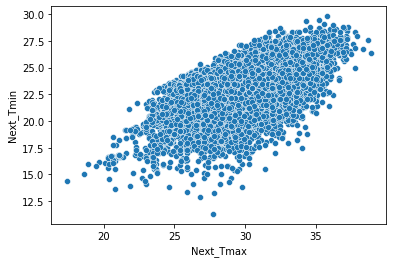

In [58]:
sns.scatterplot(x='Next_Tmax',y='Next_Tmin',data=df)

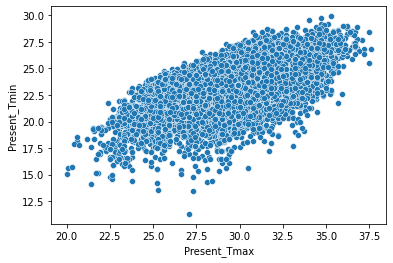

In [59]:
sns.scatterplot(x='Present_Tmax',y='Present_Tmin',data=df)

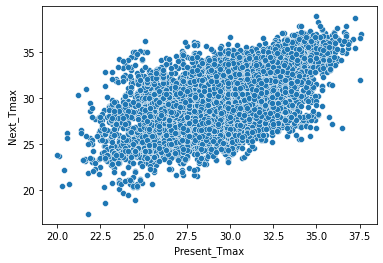

In [60]:
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

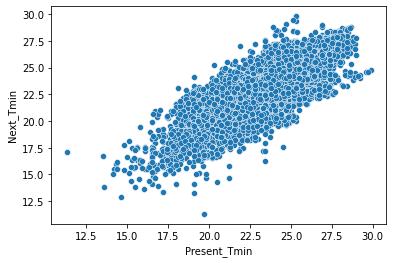

In [61]:
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

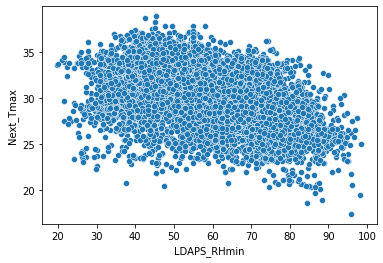

In [62]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

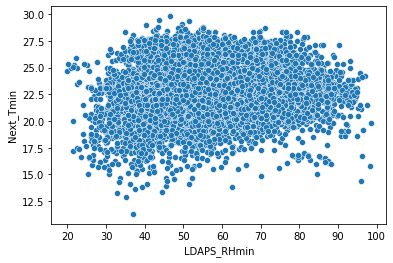

In [63]:
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)

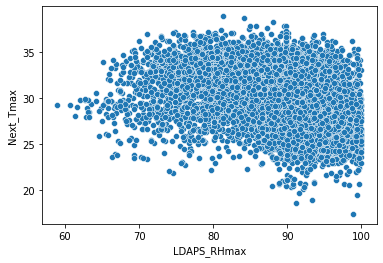

In [64]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

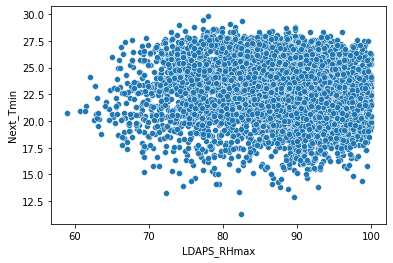

In [65]:
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmin',data=df)

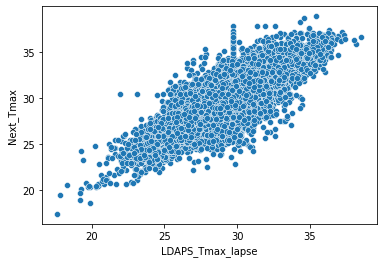

In [66]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

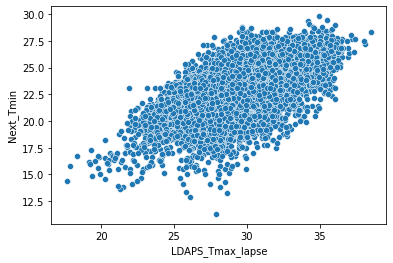

In [67]:
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df)

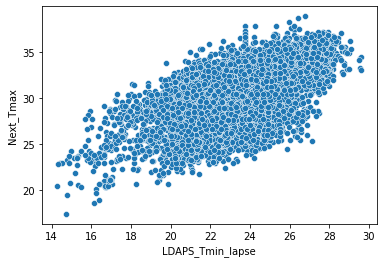

In [68]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

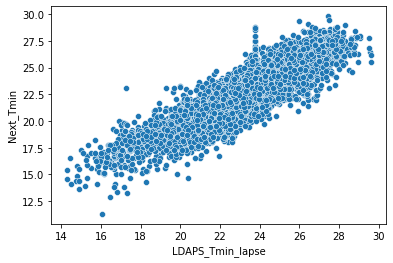

In [69]:
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

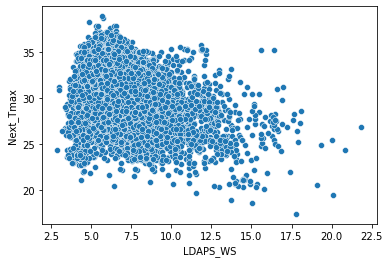

In [70]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmax',data=df)

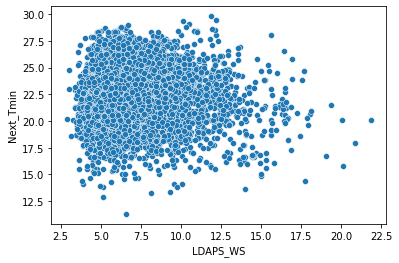

In [71]:
sns.scatterplot(x='LDAPS_WS',y='Next_Tmin',data=df)

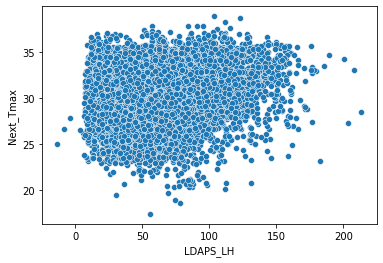

In [74]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmax',data=df)

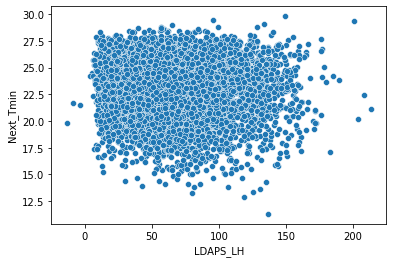

In [75]:
sns.scatterplot(x='LDAPS_LH',y='Next_Tmin',data=df)

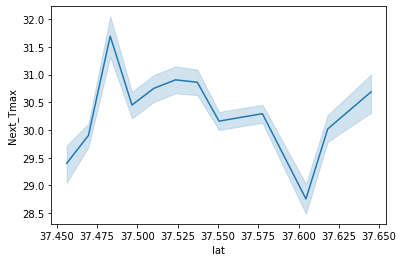

In [88]:
sns.lineplot(x='lat',y='Next_Tmax',data=df)

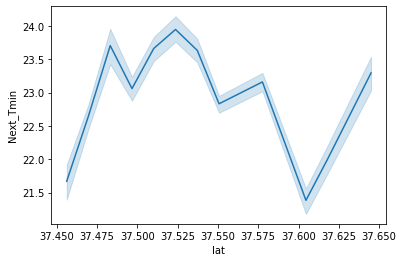

In [89]:
sns.lineplot(x='lat',y='Next_Tmin',data=df)

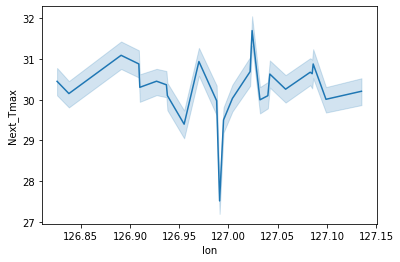

In [91]:
sns.lineplot(x='lon',y='Next_Tmax',data=df)

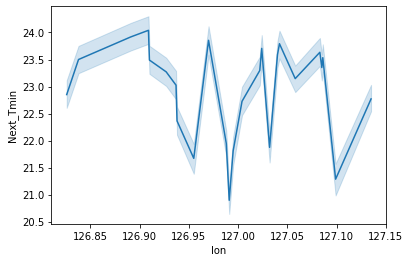

In [90]:
sns.lineplot(x='lon',y='Next_Tmin',data=df)

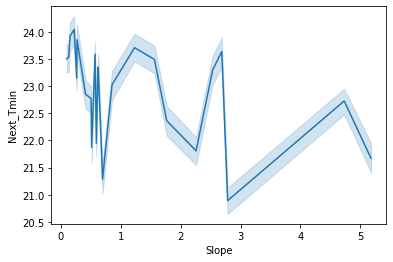

In [92]:
sns.lineplot(x='Slope',y='Next_Tmin',data=df)

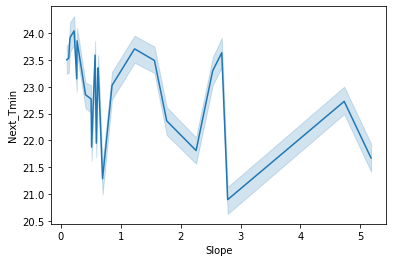

In [93]:
sns.lineplot(x='Slope',y='Next_Tmin',data=df)

**Lets divide the dataset into independent and dependent feature**

In [94]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day_no,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,6,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,6,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,6,2013


In [135]:
X=df.drop(['Date','Next_Tmax','Next_Tmin'],axis=1)#1st independent
y=df['Next_Tmax']#1st dependent
z=df['Next_Tmin']#2nd dependent

In [136]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day_no,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,6,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,6,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,6,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,6,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,6,6,2013


In [137]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [138]:
z.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [139]:
X.shape

(7750, 25)

In [140]:
y.shape

(7750,)

In [141]:
z.shape

(7750,)

**Lets check correlation fo all the independnet feature for feature selection.**

In [107]:
X.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day_no,Month,Year
station,1.000000e+00,0.112712,0.131800,-0.066792,-0.167164,0.069223,0.104905,0.005292,-0.133557,0.006921,0.003398,0.000694,0.006127,-0.002735,-0.008328,-0.012609,-0.010529,-2.376097e-01,-1.187626e-01,-2.559703e-01,-9.011266e-02,-0.019011,1.591195e-19,-6.892924e-19,0.000000e+00
Present_Tmax,1.127123e-01,1.000000,0.617708,-0.207834,-0.303296,0.569108,0.623273,-0.127261,0.132081,-0.314965,-0.215655,-0.147257,-0.144148,-0.114393,-0.104797,-0.126702,-0.105705,-5.417670e-02,7.496575e-03,-1.887959e-01,-1.074083e-01,-0.026970,1.755283e-02,1.460578e-01,6.006019e-02
Present_Tmin,1.317998e-01,0.617708,1.000000,0.119517,-0.015917,0.462438,0.763468,-0.041562,-0.014449,0.080682,0.088566,-0.007221,-0.049228,0.109625,0.064409,-0.051814,-0.068872,-8.059098e-02,-4.560787e-02,-2.525424e-01,-1.484211e-01,0.051718,2.844476e-02,8.739385e-02,3.778587e-02
LDAPS_RHmin,-6.679165e-02,-0.207834,0.119517,1.000000,0.578099,-0.568521,0.087296,0.292614,-0.073243,0.613442,0.745152,0.689352,0.513560,0.260789,0.390445,0.238604,0.165627,8.590362e-02,-7.769085e-02,1.009374e-01,1.225892e-01,0.243665,4.996555e-02,-1.895986e-01,-2.046299e-03
LDAPS_RHmax,-1.671638e-01,-0.303296,-0.015917,0.578099,1.000000,-0.377190,-0.116879,0.132932,0.236723,0.435665,0.390659,0.225583,0.129075,0.268563,0.228773,0.133375,0.116409,1.947449e-01,2.422101e-02,1.763894e-01,2.189112e-01,0.146945,2.762194e-02,-1.172123e-01,-1.419844e-01
LDAPS_Tmax_lapse,6.922299e-02,0.569108,0.462438,-0.568521,-0.377190,1.000000,0.652940,-0.317212,0.045145,-0.441006,-0.526431,-0.544191,-0.432093,-0.117189,-0.249765,-0.196160,-0.168064,-4.389566e-02,8.905023e-02,-1.808669e-01,-1.642710e-01,0.046086,-3.778848e-03,9.761235e-02,1.619927e-02
LDAPS_Tmin_lapse,1.049050e-01,0.623273,0.763468,0.087296,-0.116879,0.652940,1.000000,-0.134152,-0.138007,0.009232,0.046278,-0.045888,-0.082247,0.034241,-0.003376,-0.094481,-0.100734,-9.800883e-02,-2.842850e-02,-1.972411e-01,-1.876166e-01,0.158038,2.988900e-02,2.380639e-02,-4.699992e-03
LDAPS_WS,5.292452e-03,-0.127261,-0.041562,0.292614,0.132932,-0.317212,-0.134152,1.000000,0.002620,0.288462,0.259595,0.241674,0.219239,0.143783,0.183520,0.152048,0.134070,3.458870e-02,-6.178180e-02,1.890513e-01,1.695018e-01,0.121495,1.228443e-02,-1.128311e-01,-1.116838e-01
LDAPS_LH,-1.335571e-01,0.132081,-0.014449,-0.073243,0.236723,0.045145,-0.138007,0.002620,1.000000,-0.149007,-0.266561,-0.247575,-0.174516,-0.019775,-0.085545,0.008329,0.012156,1.318092e-01,2.421263e-02,5.336818e-02,8.505040e-02,-0.048225,-2.050723e-02,6.537520e-02,5.716317e-02
LDAPS_CC1,6.920867e-03,-0.314965,0.080682,0.613442,0.435665,-0.441006,0.009232,0.288462,-0.149007,1.000000,0.779382,0.517201,0.360707,0.446996,0.389627,0.166723,0.088741,-9.046491e-03,-7.762708e-03,-1.508883e-02,-2.177096e-02,0.218525,3.484802e-02,-2.101993e-01,-6.649795e-02


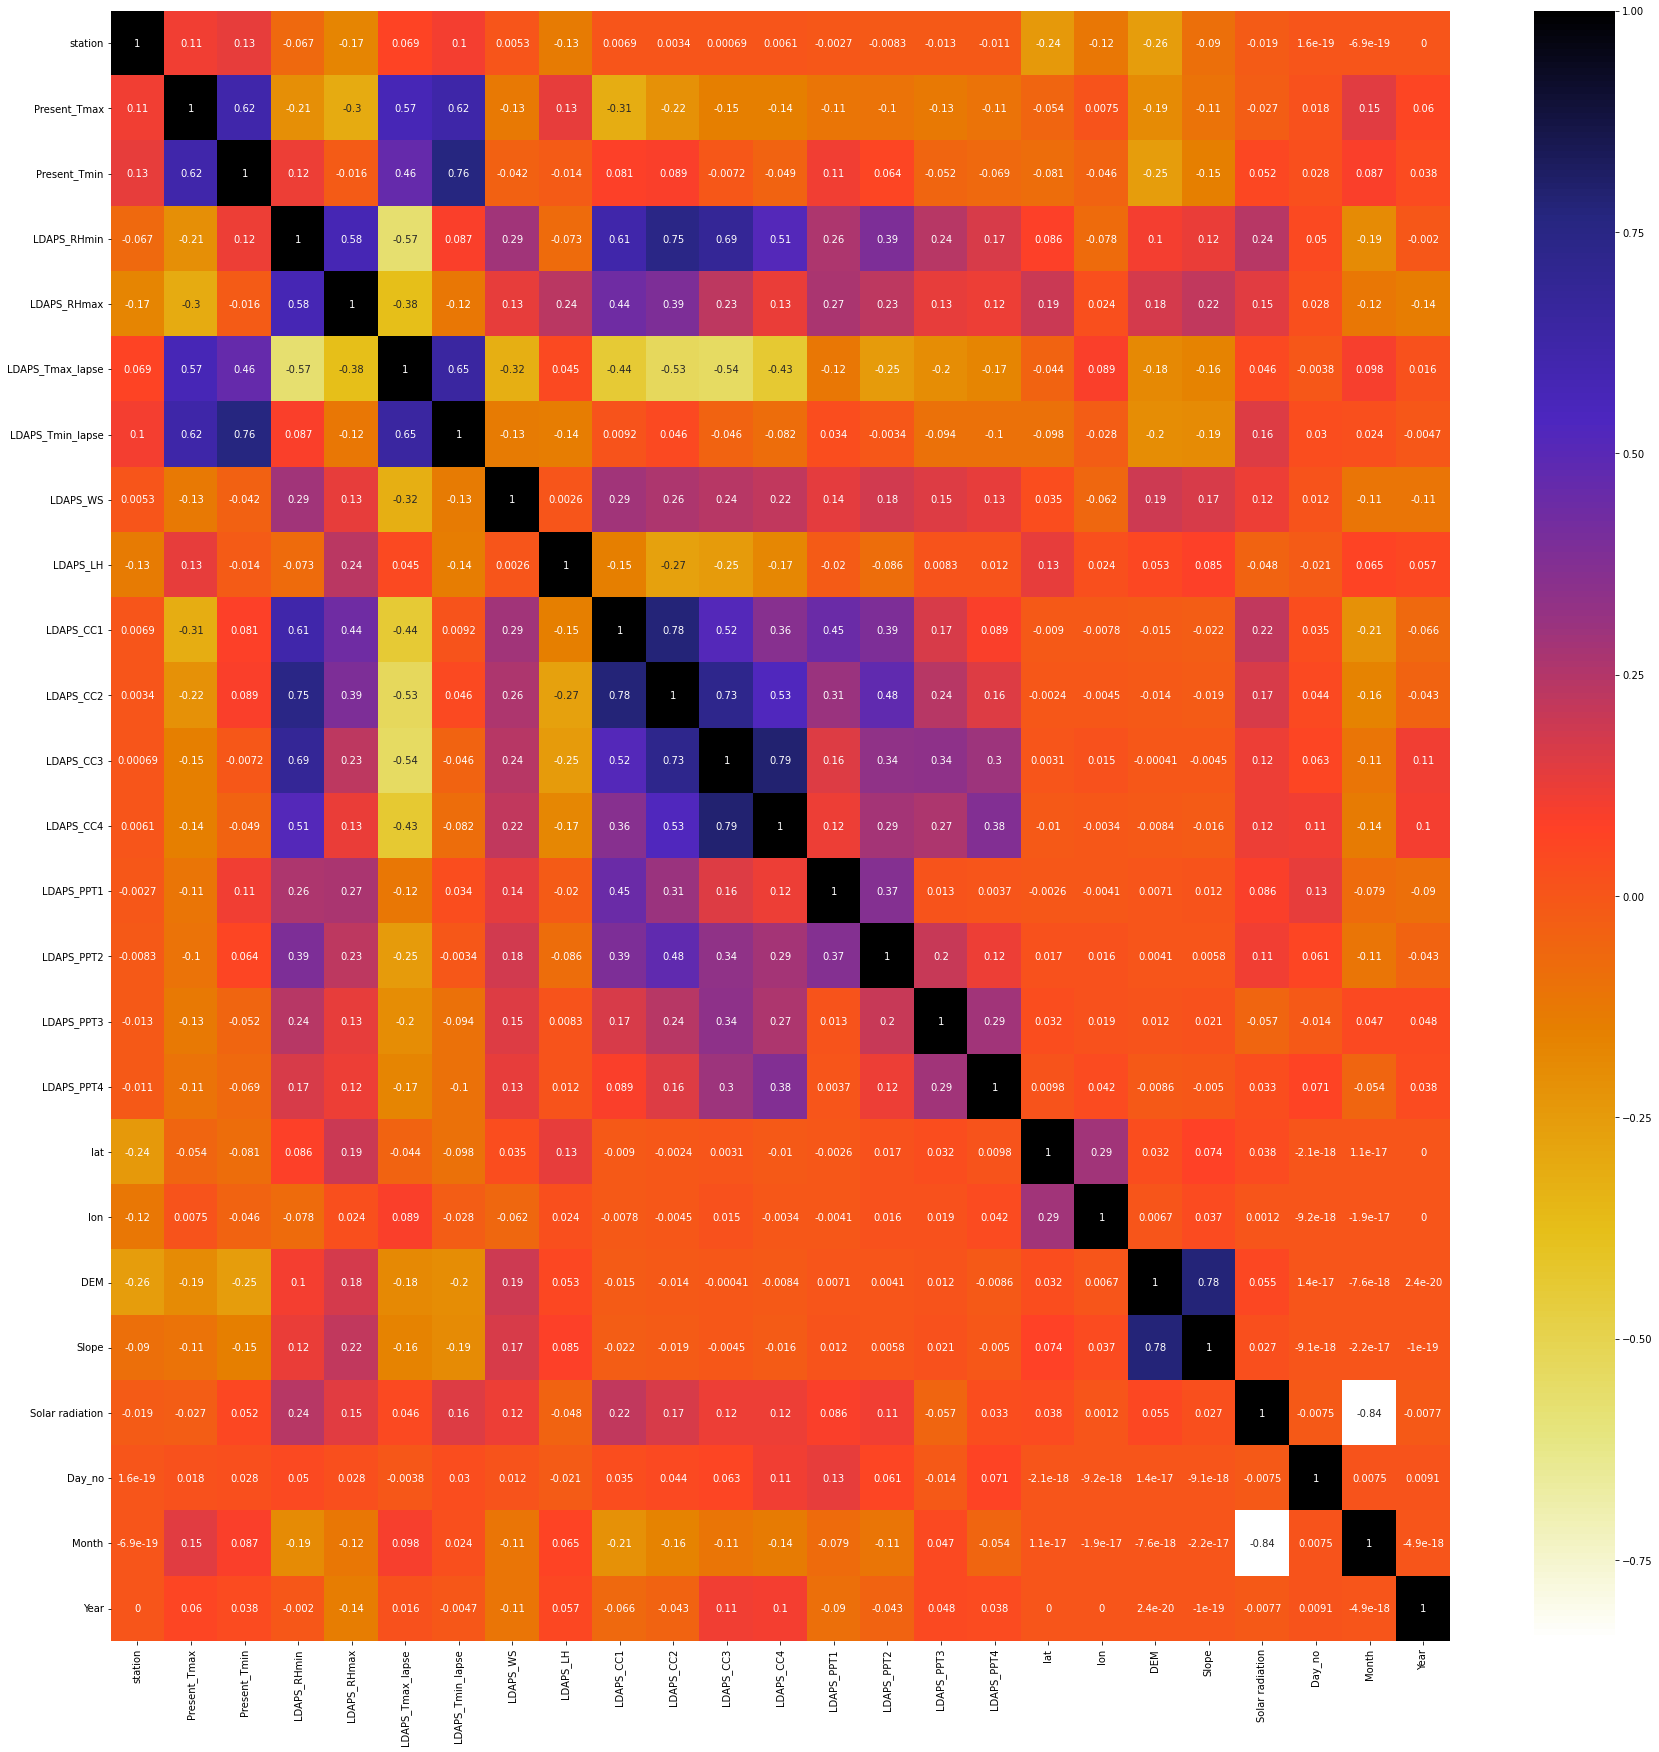

In [108]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [109]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [110]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

0

**There is no correlation so need  for feature selection**

In [111]:
corr_features

set()

**We will divide the dataset for training and testing for model development.**

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train1,X_test1,y_train1,y_test1=train_test_split(X,z,test_size=0.3,random_state=42)

In [143]:
X_train.shape

(5425, 25)

In [144]:
X_test.shape

(2325, 25)

In [145]:
y_train.shape

(5425,)

In [146]:
y_test.shape

(2325,)

**RandomForest Regressor for y as dependent feature**

In [147]:
rdf=RandomForestRegressor()
rdf.fit(X_train,y_train)
y_pred1=rdf.predict(X_test)

In [148]:
y_pred1

array([29.377, 33.054, 35.205, ..., 29.326, 29.535, 25.645])

In [149]:
r2_score(y_pred1,y_test)

0.8784035037524621

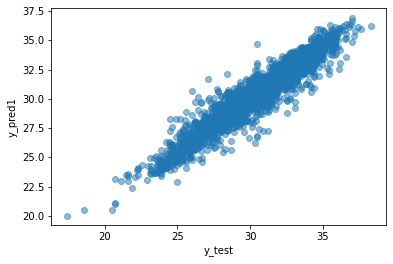

In [150]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [151]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 0.9599461608602142
MAE: 0.7270675268817202
RMSE: 0.9797684220570768


**RandomForest Regressor for z as dependent feature**

In [152]:
rdf1=RandomForestRegressor()
rdf1.fit(X_train1,y_train1)
pred1=rdf1.predict(X_test1)

In [153]:
pred1

array([21.515, 22.26 , 24.672, ..., 18.745, 24.18 , 19.831])

In [154]:
r2_score(pred1,y_test1)

0.8837241634275949

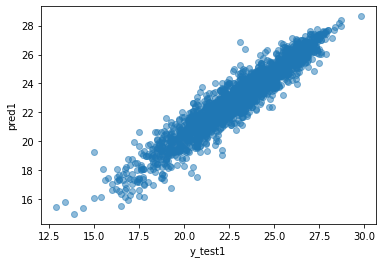

In [155]:
plt.scatter(y_test1,pred1,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred1")
plt.show()

In [156]:
print("MSE:",mean_squared_error(pred1,y_test1))
print("MAE:",mean_absolute_error(pred1,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test1)))

MSE: 0.5868691212903226
MAE: 0.5838972043010753
RMSE: 0.7660738354038223


**AdaBoost Regressor for y as dependent feature**

In [161]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred2=ada.predict(X_test)

In [162]:
y_pred2

array([28.76148789, 33.3770183 , 33.40642398, ..., 29.0744335 ,
       29.24814503, 26.75327511])

In [170]:
r2_score(y_pred2,y_test)

0.5794961008314345

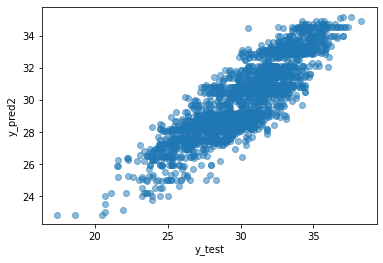

In [164]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [166]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 2.342213617450158
MAE: 1.2296964050354102
RMSE: 1.530429226540763


**AdaBoost Regressor for z as dependent feature**

In [167]:
ada1=AdaBoostRegressor()
ada1.fit(X_train1,y_train1)
pred2=ada1.predict(X_test1)

In [168]:
pred2

array([21.23297872, 22.96416526, 24.99312977, ..., 18.54482759,
       23.94799589, 20.39464809])

In [169]:
r2_score(pred2,y_test1)

0.7135626829409452

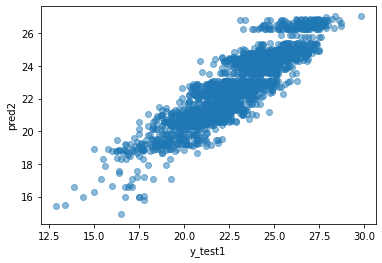

In [171]:
plt.scatter(y_test1,pred2,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred2")
plt.show()

In [172]:
print("MSE:",mean_squared_error(pred2,y_test1))
print("MAE:",mean_absolute_error(pred2,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test1)))

MSE: 1.1964299682969184
MAE: 0.8751496827403916
RMSE: 1.093814412181938


**Gradient Boosting regressor for y as dependent feature**

In [173]:
gdr=GradientBoostingRegressor()
gdr.fit(X_train,y_train)
y_pred3=gdr.predict(X_test)

In [174]:
y_pred3

array([29.7636118 , 33.40582926, 34.36837067, ..., 29.21483207,
       29.7141262 , 25.28334166])

In [175]:
r2_score(y_pred3,y_test)

0.8127704590168555

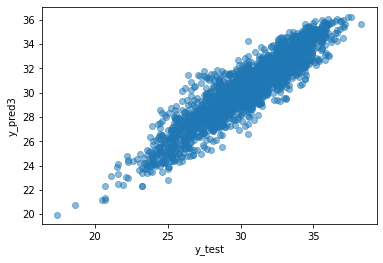

In [176]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [177]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 1.4104445118164382
MAE: 0.9144491326380532
RMSE: 1.1876213671942915


**Gradient Boosting regressor as z as a dependent feature**

In [178]:
gdr1=GradientBoostingRegressor()
gdr1.fit(X_train1,y_train1)
pred3=gdr1.predict(X_test1)

In [179]:
pred3

array([21.90105435, 22.74672908, 25.40287328, ..., 18.30101728,
       23.81561316, 19.22683098])

In [183]:
r2_score(pred3,y_test1)

0.8658953036069992

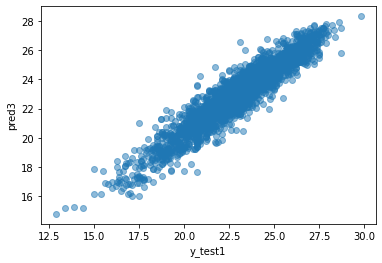

In [181]:
plt.scatter(y_test1,pred3,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred3")
plt.show()

In [182]:
print("MSE:",mean_squared_error(pred3,y_test1))
print("MAE:",mean_absolute_error(pred3,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred3,y_test1)))

MSE: 0.6735700494830948
MAE: 0.6444842409994004
RMSE: 0.8207131347085258


**LGBMRegressor as y as a dependent feature**

In [184]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred4=lgbm.predict(X_test)

In [185]:
y_pred4

array([30.39901452, 33.21559261, 35.70445611, ..., 29.24974202,
       29.42686875, 25.51626908])

In [186]:
r2_score(y_pred4,y_test)

0.9170422659338613

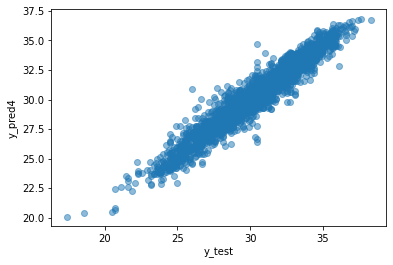

In [187]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [188]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 0.7022877142708897
MAE: 0.6390186847438997
RMSE: 0.8380260820946385


**LGBMRegressor as z as a dependent feature**

In [189]:
lgbm1=LGBMRegressor()
lgbm1.fit(X_train1,y_train1)
pred4=lgbm1.predict(X_test1)

In [190]:
pred4

array([22.00129039, 22.73725532, 25.40909982, ..., 18.20587951,
       24.02757658, 19.64977575])

In [191]:
r2_score(pred4,y_test1)

0.9243869283897803

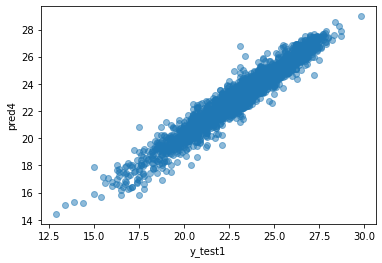

In [192]:
plt.scatter(y_test1,pred4,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred4")
plt.show()

In [193]:
print("MSE:",mean_squared_error(pred4,y_test1))
print("MAE:",mean_absolute_error(pred4,y_test1))
print("RMSE:",np.sqrt(mean_squared_error(pred4,y_test1)))

MSE: 0.4020192957374741
MAE: 0.48836216572768654
RMSE: 0.6340499158090585


**XGBRegressor as y as a dependent feature**

In [194]:
xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

[06:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [195]:
y_pred5

array([29.596445, 33.683926, 34.35217 , ..., 29.30979 , 29.797241,
       25.44307 ], dtype=float32)

In [196]:
r2_score(y_pred5,y_test)

0.808630637867658

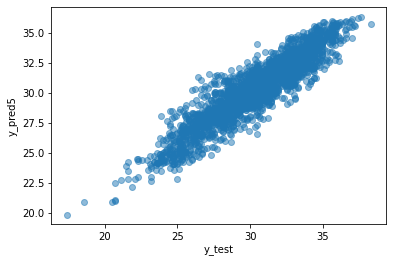

In [197]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [198]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred5,y_test)))

MSE: 1.4296607374668966
MAE: 0.9220152274511194
RMSE: 0.9602162399434407


**XGBRegressor as y as a dependent feature**

In [199]:
xgb1=xgboost.XGBRegressor()
xgb1.fit(X_train1,y_train1)
pred5=xgb1.predict(X_test1)

[06:11:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [200]:
pred5

array([21.905027, 22.73411 , 25.433954, ..., 18.384552, 23.812887,
       19.376614], dtype=float32)

In [201]:
r2_score(pred5,y_test1)

0.8655077685244363

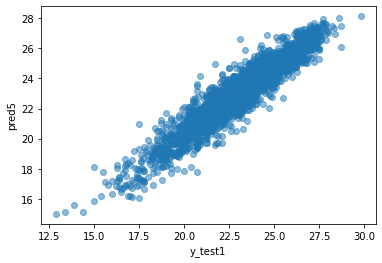

In [202]:
plt.scatter(y_test1,pred5,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred5")
plt.show()

In [203]:
print("MSE:",mean_squared_error(pred5,y_test1))
print("MAE:",mean_absolute_error(pred5,y_test1))
print("RMSE:",np.sqrt(mean_absolute_error(pred5,y_test1)))

MSE: 0.6760451348530724
MAE: 0.6453370061894899
RMSE: 0.8033287037007266


**LinearRegression as y as a dependent feature**



In [204]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred6=lr.predict(X_test)

In [205]:
y_pred6

array([29.42687906, 33.76354365, 32.93148733, ..., 29.93718056,
       30.1599483 , 25.49803857])

In [206]:
r2_score(y_pred6,y_test)

0.6925787471576996

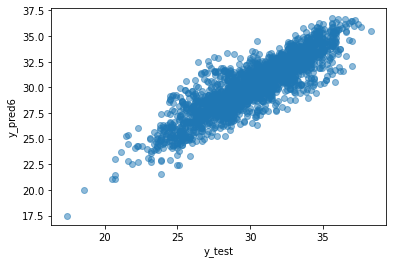

In [207]:
plt.scatter(y_test,y_pred6,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred6")
plt.show()

In [208]:
print("MSE:",mean_squared_error(y_pred6,y_test))
print("MAE:",mean_absolute_error(y_pred6,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred6,y_test)))

MSE: 2.2121707442293506
MAE: 1.1098863076373138
RMSE: 1.0535114178960348


**LinearRegression as z as a dependent feature**


In [209]:
lr1=LinearRegression()
lr1.fit(X_train1,y_train1)
pred6=lr1.predict(X_test1)

In [210]:
pred6

array([21.49714415, 23.5978969 , 24.90305222, ..., 19.54719275,
       24.51396935, 19.12226614])

In [211]:
r2_score(pred6,y_test1)

0.790804020364246

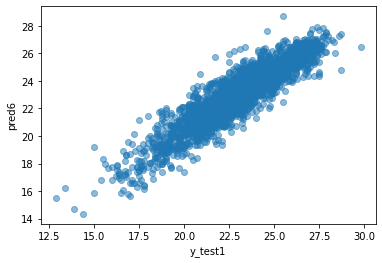

In [212]:
plt.scatter(y_test1,pred6,alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("pred6")
plt.show()

In [213]:
print("MSE:",mean_squared_error(pred6,y_test1))
print("MAE:",mean_absolute_error(pred6,y_test1))
print("RMSE:",np.sqrt(mean_absolute_error(pred6,y_test1)))

MSE: 1.0109752732964148
MAE: 0.7873526170588777
RMSE: 0.8873289226994


**Prediction using Randomforest and LGBMRegressor Algorithm(Because they are the best performing algorithms in this predictive modelling)**

In [157]:
X_test1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day_no,Month,Year
1894,20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014
5834,10.0,32.5,23.1,35.915615,86.271225,32.666059,24.372431,6.144566,85.550835,0.002907,0.012379,0.000000,0.142740,0.0,0.000000,0.0,0.000000,37.4562,126.955,208.5070,5.1782,4879.457031,1,8,2016
4922,23.0,33.8,23.5,47.242802,83.350937,32.371778,26.166470,5.962029,90.959240,0.279242,0.164443,0.553343,0.684582,0.0,0.000000,0.0,0.150047,37.5372,126.891,15.5876,0.1554,5759.948730,6,7,2016
3091,17.0,29.0,17.2,40.723473,92.787651,27.799116,18.213853,4.216105,104.336004,0.104597,0.245842,0.166400,0.102899,0.0,0.000000,0.0,0.000000,37.6181,127.099,53.4712,0.6970,4460.537109,5,8,2014
3149,25.0,28.0,21.8,26.133261,87.295136,29.204623,20.661688,8.522427,21.892517,0.064970,0.245546,0.054553,0.000000,0.0,0.004313,0.0,0.000000,37.5237,126.970,19.5844,0.2713,5849.743164,2,7,2015


In [158]:
prediction_t1=rdf.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Max Temperature:",prediction_t1,'C')
prediction_t2=rdf1.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Min Temperature:",prediction_t2,'C')

Max Temperature: [29.377] C
Min Temperature: [21.515] C


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [214]:
prediction_t1=lgbm.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Max Temperature:",prediction_t1,'C')
prediction_t2=lgbm1.predict([[20.0,28.8,22.5,56.959469,97.570969,27.653456,21.419680,9.623752,66.007566,0.241352,0.095204,0.000000,0.000040,0.0,0.000000,0.0,0.000000,37.6181,127.004,146.5540,4.7296,5820.243164,6,7,2014]])
print("Min Temperature:",prediction_t2,'C')

Max Temperature: [30.39901452] C
Min Temperature: [22.00129039] C


**Performance chart of all the alorithms that i haved used in this max and min temperature of predictive modelling**

**better>not better**

**LGBM > RandomForest > XGB > GradientBoosting > AdaBoost > Linear Regression**


**Conclusion: In this predictive modelling after using too many differnt types of algorithm i came to conclusion that LGBM and Random forest performed way better then any other algorithm other then that LGBM performance is even better then randomforest in terms accurate result as well as it is less time consuming algorithm then any other algorithm which i haved use in this predictive modelling.The most accurate result is give LGBM Algorithm**